In [1]:
import pandas as pd
import os

df = pd.read_csv('../input/country-metrics/country_pairs.csv')
headers = list(df.columns)

In [7]:
df.head(n=5)

,train_country,test_country,auc_score,distance,train_pdi,train_idv,train_mas,train_uai,train_ltowvs,train_ivr,...,abs_diff_idv,abs_diff_mas,abs_diff_uai,abs_diff_ltowvs,abs_diff_ivr,abs_diff_gdp_2015,abs_diff_gdp_bill,abs_diff_happiness,abs_diff_population,abs_diff_per_capita
0,AE,AE,0.974383,0.000000,80,38,53,68,23,34,...,0,0,0,0,0,0.000000e+00,0.00,0.0000,0,0.00
1,AE,AR,0.969566,0.004817,80,38,53,68,23,34,...,8,3,18,3,28,2.370000e+11,2.37,0.7382,33869070,44796.68
2,AE,AT,0.969226,0.005156,80,38,53,68,23,34,...,17,26,2,37,29,2.400000e+10,0.24,0.4215,620197,15035.98
3,AE,AU,0.968710,0.005672,80,38,53,68,23,34,...,52,8,17,2,37,9.920000e+11,9.92,0.4035,14553099,18613.55
4,AE,BD,0.972427,0.001956,80,38,53,68,23,34,...,18,2,8,24,14,1.630000e+11,1.63,2.3687,146993391,61346.37


In [14]:
distances = list(df['distance'])
diffs = {x: list(df[x]) for x in headers if 'abs' in x}

ρ=0.088, p=0.000


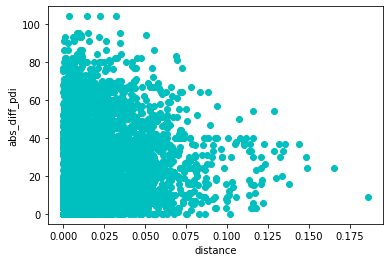

ρ=0.036, p=0.003


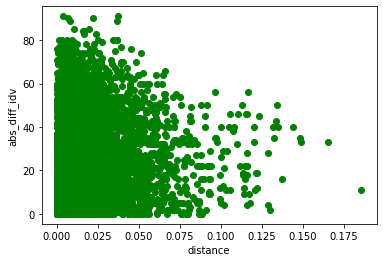

ρ=0.033, p=0.008


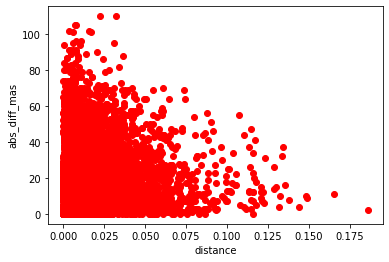

ρ=0.024, p=0.052


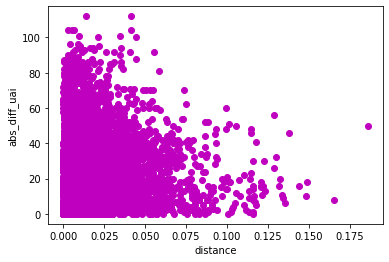

ρ=0.085, p=0.000


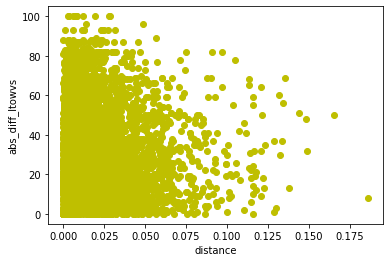

ρ=0.062, p=0.000


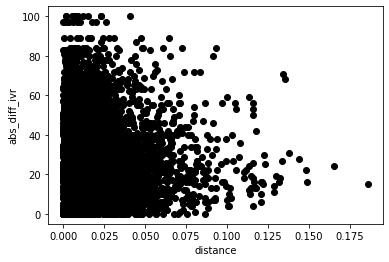

ρ=-0.135, p=0.000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


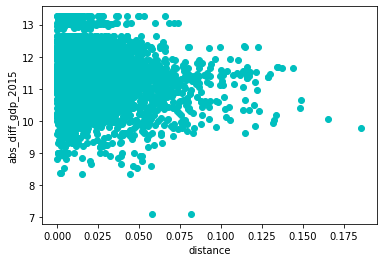

ρ=-0.136, p=0.000


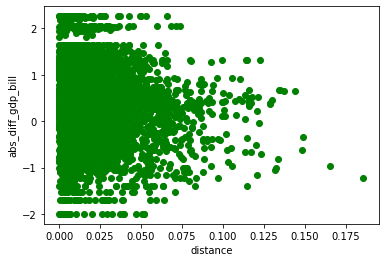

ρ=0.116, p=0.000


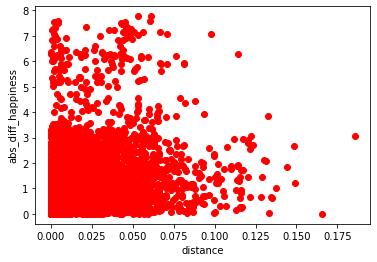

ρ=-0.005, p=0.694


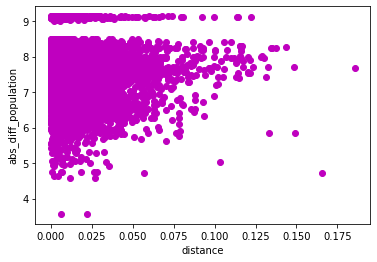

ρ=0.053, p=0.000


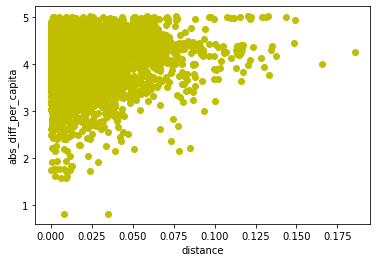

In [50]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import spearmanr

x = 0
y = 0

colors = ['c', 'g', 'r', 'm', 'y', 'k']

for h in diffs:
    if 'population' in h or 'gdp' in h or 'capita' in h:
        yaxis = [np.log10(x) for x in diffs[h]]
    else:
        yaxis = diffs[h]
    
    coef, p = spearmanr(distances, yaxis)
    
    plt.scatter(distances, yaxis, color=colors[(x*3+y)%6])
    plt.ylabel(h)
    plt.xlabel('distance')
    
    if y == 2:
        x += 1
        y = 0
    else:
        y += 1
    
    print('ρ={:.3f}, p={:.3f}'.format(coef, p))
    plt.show()

In [49]:
for h in diffs:
    if 'population' in h or 'gdp' in h or 'capita' in h:
        yaxis = [np.log10(x) for x in diffs[h]]
    else:
        yaxis = diffs[h]
    
    coef, p = spearmanr(distances, yaxis)
    
    if p < .05:
        print('{}*: ρ={:.3f}, p={:.3f}'.format(h, coef, p))
    else:
        print('{}: ρ={:.3f}, p={:.3f}'.format(h, coef, p))

abs_diff_pdi*: ρ=0.088, p=0.000
abs_diff_idv*: ρ=0.036, p=0.003
abs_diff_mas*: ρ=0.033, p=0.008
abs_diff_uai: ρ=0.024, p=0.052
abs_diff_ltowvs*: ρ=0.085, p=0.000
abs_diff_ivr*: ρ=0.062, p=0.000
abs_diff_gdp_2015*: ρ=-0.135, p=0.000
abs_diff_gdp_bill*: ρ=-0.136, p=0.000
abs_diff_happiness*: ρ=0.116, p=0.000
abs_diff_population: ρ=-0.005, p=0.694
abs_diff_per_capita*: ρ=0.053, p=0.000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
